In [55]:
!pip install xgboost

In [56]:
import pandas as pd

import matplotlib 
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('data/신용카드사기검출/creditcard.csv')

In [58]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [60]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [61]:
df.Time

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

<AxesSubplot:ylabel='Frequency'>

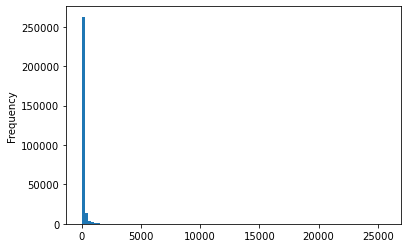

In [62]:
df.Amount.plot(kind = 'hist', bins = 100)

<AxesSubplot:>

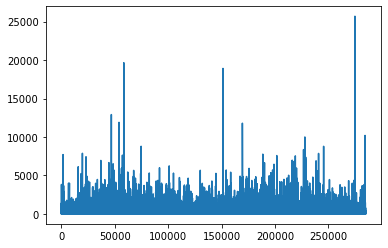

In [63]:
df.Amount.plot()

In [64]:
df.describe() ## Amount 칼럼 standard Scaling 해야함

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [65]:
df.Class.value_counts()
# 0: 정상 거래
# 1: 비정상 거래 (카드 도용, 사기,...)

0    284315
1       492
Name: Class, dtype: int64

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred) 
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:.3f}, 정밀도:{1:.3f}, 재현율:{2:.3f}, F1:{3:.3f}, AUC:{4:.3f}'.format(accuracy, precision, recall, f1, auc))

In [67]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<AxesSubplot:ylabel='Frequency'>

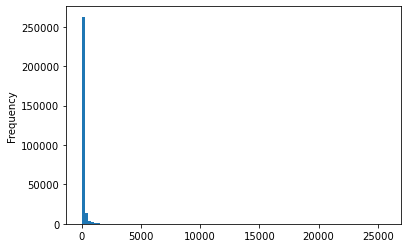

In [68]:
# Amount 컬럼 시각화
#df.Amount.plot()
df.Amount.plot(kind = 'hist', bins = 100)

#import seaborn as sns
#sns.displot(df.Amount)

In [69]:
corr = df.corr()
abs(corr['Class']).sort_values()

V22       0.000805
V23       0.002685
V25       0.003308
V15       0.004223
V26       0.004455
V13       0.004570
Amount    0.005632
V24       0.007221
V28       0.009536
Time      0.012323
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V6        0.043643
V2        0.091289
V5        0.094974
V9        0.097733
V1        0.101347
V18       0.111485
V4        0.133447
V11       0.154876
V7        0.187257
V3        0.192961
V16       0.196539
V10       0.216883
V12       0.260593
V14       0.302544
V17       0.326481
Class     1.000000
Name: Class, dtype: float64

<AxesSubplot:>

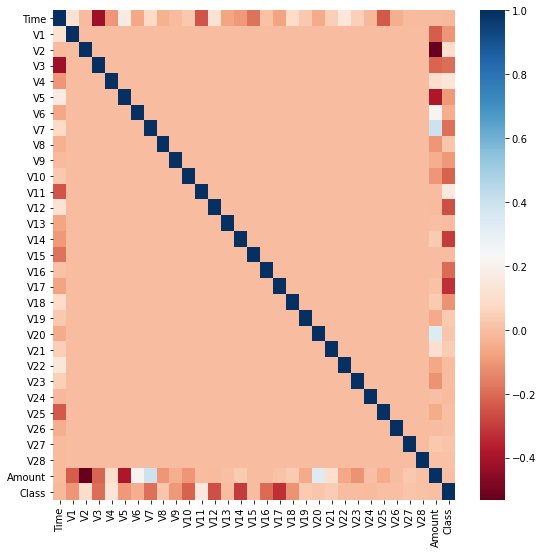

In [70]:
# 이상치 제거 --> 상관관계가 가장 높은 V17 컬럼을 선택해서 outlier 제거
import seaborn as sns
plt.figure(figsize = (9,9))
corr = df.corr()
sns.heatmap(corr, cmap = 'RdBu')

In [71]:
def get_outlier(df, column, weight):
    fraud = df[df.Class == 1][column]
    # 25%, 75% 분위값을 계산
    q25 = fraud.quantile(0.25)
    q75 = fraud.quantile(0.75)
    iqr = q75 - q25
    lowest = q25 - iqr*weight
    highest = q75 + iqr*weight
    return fraud[(fraud < lowest) | (fraud > highest)].index

In [72]:
get_outlier(df, 'V17', 1)

Int64Index([42473, 42528, 42609, 42635, 42674, 42856, 150665], dtype='int64')

In [73]:
from sklearn.preprocessing import StandardScaler
def get_preprocessed_df(df):
    # 전처리 함수
    df_copy = df.copy()
    # 1. Time 컬럼 삭제
    df_copy.drop('Time', axis = 1, inplace = True)
    # 2. Amount 컬럼은 standardScaler 적용
    sc = StandardScaler()
    df_copy['Amount'] = sc.fit_transform(df_copy.Amount.values.reshape(-1, 1))
    # 3. V17의 outlier를 제거
    out_idx = get_outlier(df_copy, 'V17', 1)
    df_copy.drop(out_idx, axis = 0, inplace = True)
    return df_copy

In [74]:
from sklearn.model_selection import train_test_split
def get_train_test_dataset(df):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.drop('Class', axis = 1)
    y_target = df_copy['Class']
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target)
    return X_train, X_test, y_train, y_test

In [75]:
X_train, X_test, y_train, y_test = get_train_test_dataset(df)

In [76]:
# 간단한 모델 생성 및 실습
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter = 2000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [77]:
# XGBoost 모델 실습
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder= False, eval_metric = 'logloss')
xgb.fit(X_train, y_train)
# pip install xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [78]:
# 평가 지표 출력
print('[LogisticRegression]\n', get_clf_eval(y_test, lr_clf.predict(X_test)))
print('[XGBoost]\n', get_clf_eval(y_test, xgb.predict(X_test)))

오차 행렬
[[71067    10]
 [   48    75]]
정확도:0.999, 정밀도:0.882, 재현율:0.610, F1:0.721, AUC:0.805
[LogisticRegression]
 None
오차 행렬
[[71074     3]
 [   35    88]]
정확도:0.999, 정밀도:0.967, 재현율:0.715, F1:0.822, AUC:0.858
[XGBoost]
 None


In [79]:
# 샘플링 for 불균형 데이터 처리
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [80]:
#imbalanced-learn 라이브러리 설치
#from imblearn.over_sampling import SMOTE
import imblearn 
from imblearn.over_sampling import SMOTE
# conda install -c conda-forge imbalan ced-learn
# pip install delayed
# conda install nb_conda
# 쥬피터 노트북을 재시작

In [81]:
imblearn.__version__

'0.7.0'

In [82]:
sm = SMOTE()
X_train_over, y_train_over = sm.fit_sample(X_train, y_train) 
# imblearn 버전이 0.8인 경우, fit_resample() 함수 활용

In [83]:
len(X_train)

213600

In [84]:
len(X_train_over)

426476

In [85]:
y_train.value_counts()

0    213238
1       362
Name: Class, dtype: int64

In [86]:
y_train_over.value_counts()

1    213238
0    213238
Name: Class, dtype: int64

In [87]:
# XGBoost 모델 실습
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder= False, eval_metric = 'logloss')
xgb.fit(X_train_over, y_train_over)
# pip install xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [88]:
get_clf_eval(y_test, xgb.predict(X_test))

오차 행렬
[[71050    27]
 [   26    97]]
정확도:0.999, 정밀도:0.782, 재현율:0.789, F1:0.785, AUC:0.894


In [89]:
#conda install -c conda-forge imbalanced-learn

In [90]:
#!pip install delayed

In [91]:
#conda install nb_conda

In [92]:
#import imblearn